## Heart Disease Prediction

I'm currently building a linear regression model to predict the risk of heart disease using the UCI Heart Disease dataset. The goal is to analyze how factors like age, cholesterol levels, resting blood pressure, and other clinical features influence the likelihood of developing heart-related conditions. This project focuses on applying regression techniques, data preprocessing, and model evaluation to gain meaningful health insights from real-world medical data.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [3]:
import pandas as pd

# Assuming the CSV file is named 'heart.csv' within the downloaded path
csv_file_path = f"/kaggle/input/heart-disease-data/heart_disease_uci.csv"

try:
    df = pd.read_csv(csv_file_path)
    print("CSV file opened successfully:")
    df.head() # Print the first few rows of the DataFrame
except FileNotFoundError:
    print(f"Error: The file {csv_file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


CSV file opened successfully:


In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
df.shape

(920, 16)

<Axes: >

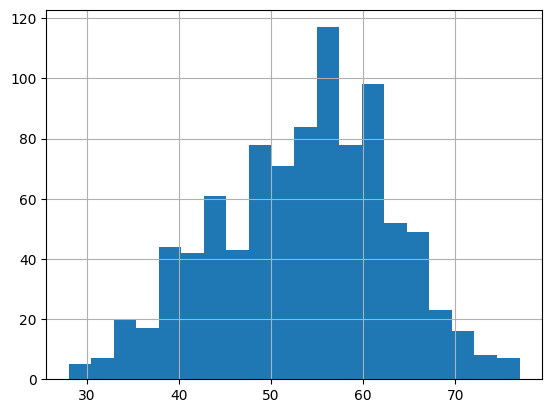

In [6]:
df.age.hist(bins=20)

<Axes: ylabel='sex'>

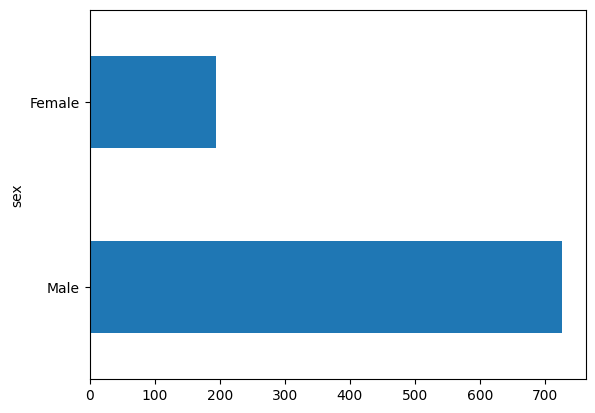

In [7]:
df.sex.value_counts().plot(kind='barh')

<Axes: ylabel='thal'>

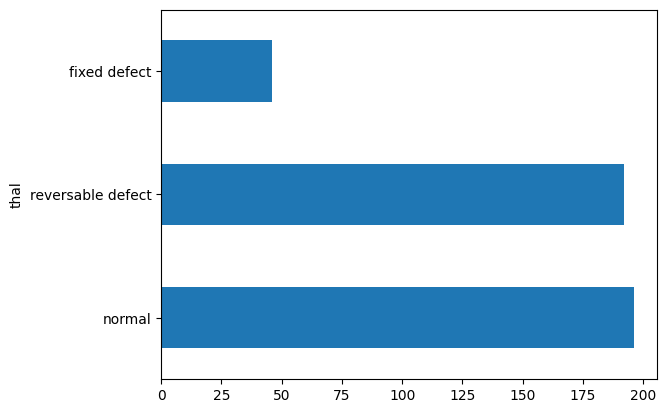

In [8]:
df['thal'].value_counts().plot(kind='barh')

<Axes: >

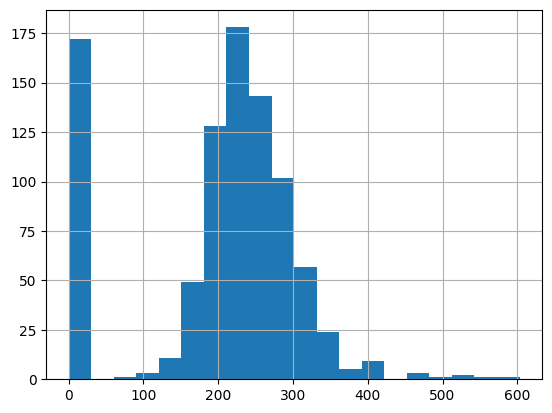

In [9]:
df['chol'].hist(bins=20)

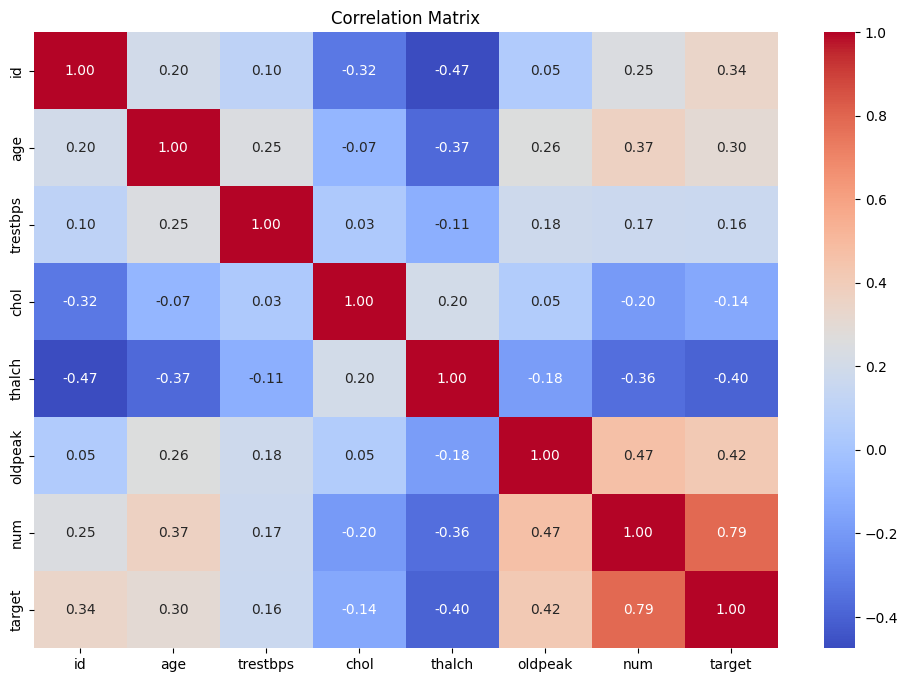

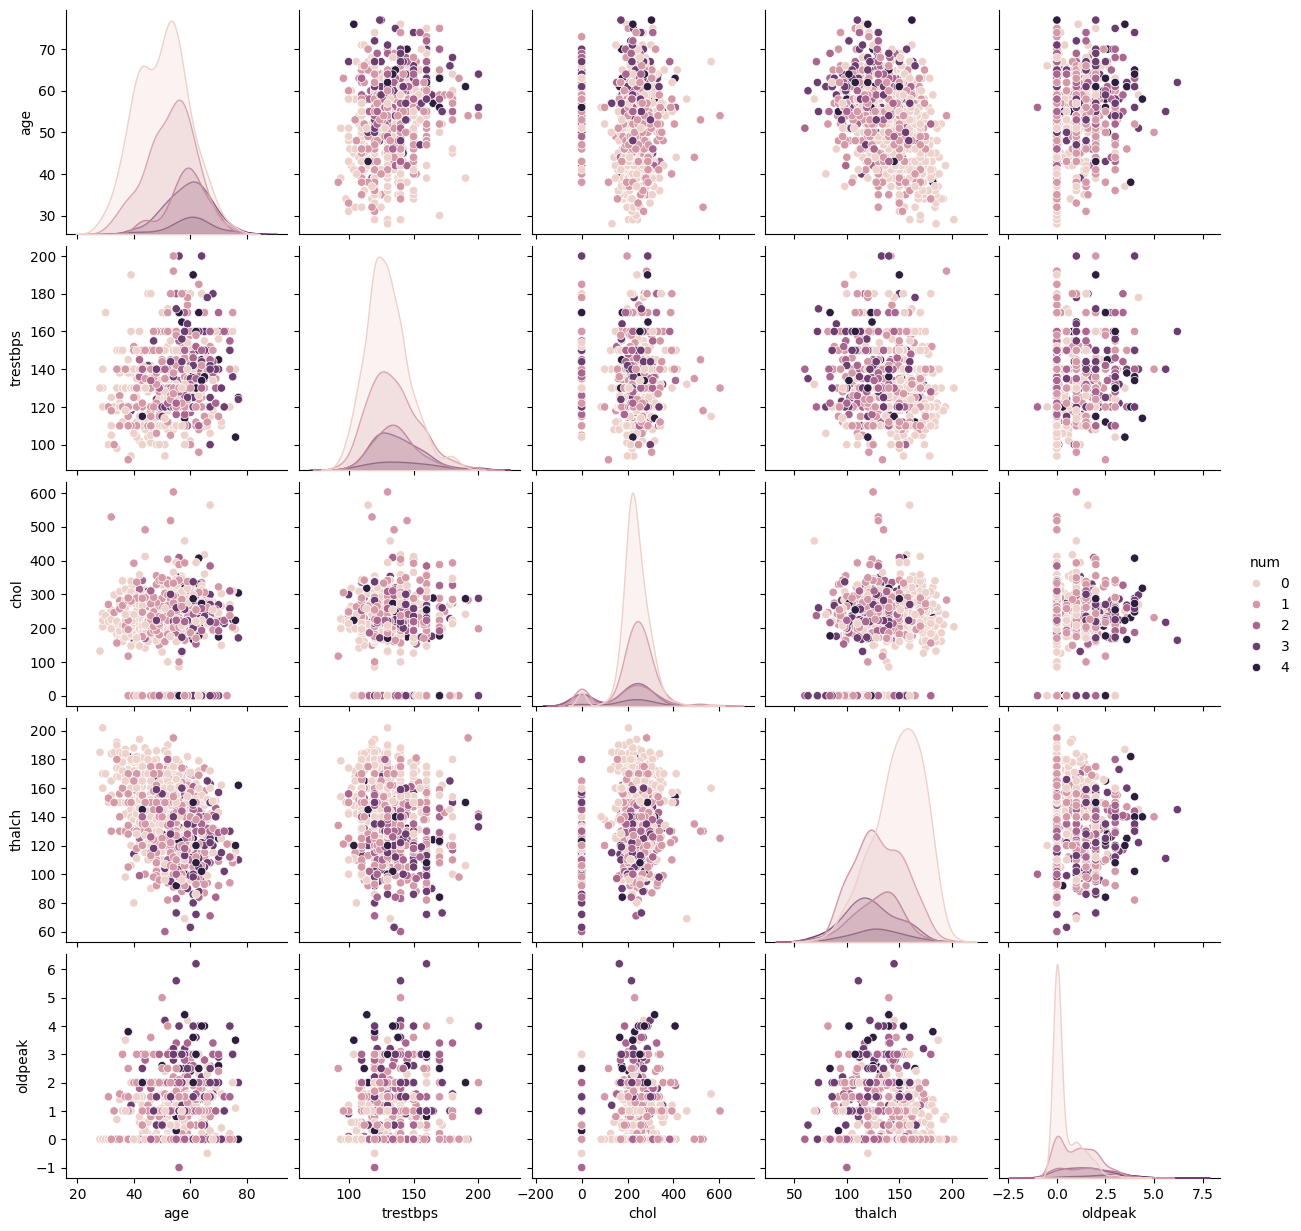

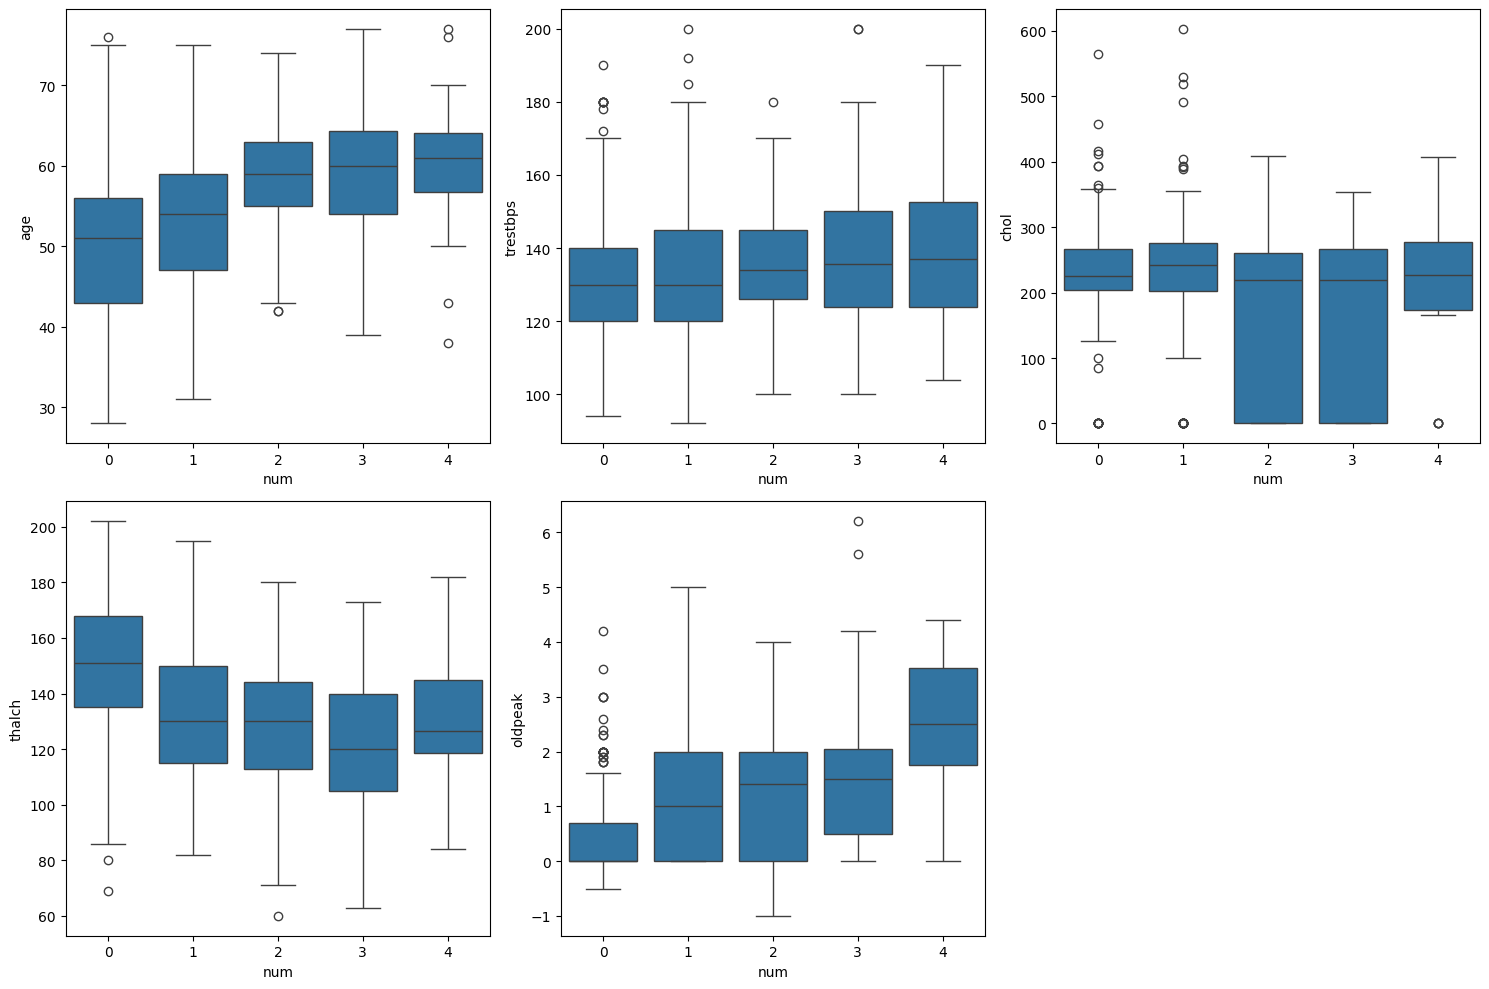

In [31]:
# First import matplotlib at the beginning of your notebook/code
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=[np.number])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for numerical features
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']], hue='num')
plt.show()

# Boxplots for numerical features vs target
plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalch', 'oldpeak']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='num', y=col, data=df)
plt.tight_layout()
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [11]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [12]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

# For categorical columns with missing values, we can fill with mode or create a new category
df['restecg'] = df['restecg'].fillna('unknown')
df['slope'] = df['slope'].fillna('unknown')
df['thal'] = df['thal'].fillna('unknown')

# Drop columns with too many missing values that can't be reasonably imputed
df.drop(['ca'], axis=1, inplace=True)  # 309/920 values missing (66% missing)

In [13]:
# find the record where trestbps is zero
df[df['trestbps'] == 0]

# remove this record from the data
df = df[df['trestbps'] != 0]

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(774, 15)

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Define categorical and numerical columns
# Lists are created to separate the column names into categorical and numerical types.
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope',  'thal']
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Target variable - converting to binary classification (0 = no disease, 1 = disease)
# A new column 'target' is created based on the 'num' column.
# If 'num' is greater than 0, 'target' is set to 1 (indicating heart disease), otherwise it's 0.
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
# The target variable 'y' is assigned the 'target' column.
y = df['target']

# Features (drop target and id)
# The feature matrix 'X' is created by dropping the 'target', 'num', and 'id' columns from the DataFrame.
X = df.drop(columns=['target', 'num', 'id'])

# Split into training/testing sets
# The data is split into training and testing sets for both features (X) and the target variable (y).
# test_size=0.3 means 30% of the data will be used for testing.
# random_state=42 ensures the split is the same each time the code is run.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the column transformer
# ColumnTransformer is used to apply different preprocessing steps to different columns.
preprocessor = ColumnTransformer(
    transformers=[
        # 'num' applies StandardScaler to the numerical columns to scale them.
        ('num', StandardScaler(), numeric_cols),
        # 'cat' applies OneHotEncoder to the categorical columns to convert them into a numerical format.
        # handle_unknown='ignore' tells the encoder to ignore unknown categories encountered during testing.
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])



# Define the models dictionary
# A dictionary 'models' is created to store different machine learning models and their hyperparameters for tuning.
models = {
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "model__C": [0.1, 1, 10], # Regularization parameter
            "model__penalty": ['l1', 'l2'], # Type of regularization
            "model__solver": ['liblinear'] # Optimization algorithm
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "model__n_estimators": [100, 200], # Number of trees in the forest
            "model__max_depth": [None, 10, 20], # Maximum depth of the trees
            "model__min_samples_split": [2, 5], # Minimum number of samples required to split a node
            "model__class_weight": ['balanced', None] # Weights associated with classes
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42),
        "params": {
            "model__n_estimators": [100, 200], # Number of boosting rounds
            "model__max_depth": [3, 6, 9], # Maximum depth of the trees
            "model__learning_rate": [0.01, 0.1, 0.3], # Step size shrinkage to prevent overfitting
            "model__subsample": [0.8, 1.0], # Fraction of samples used for fitting the individual base learners.
            "model__colsample_bytree": [0.8, 1.0] # Fraction of features used for fitting the individual base learners.
        }
    },
    "SVM": {
        "model": SVC(probability=True), # probability=True enables probability estimates
        "params": {
            "model__C": [0.1, 1, 10], # Regularization parameter
            "model__kernel": ['linear', 'rbf'] # Kernel type
        }
    }
}

# Train and evaluate each model
# A dictionary 'results' is initialized to store the evaluation results for each model.
results = {}
# The code iterates through each model defined in the 'models' dictionary.
for name, config in models.items():
    # Create pipeline
    # A pipeline is created to chain the preprocessor and the model.
    # This ensures that the data is preprocessed correctly before being fed into the model.
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    # If there are hyperparameters, do grid search
    # This checks if hyperparameters are defined for the current model.
    if config['params']:
        # GridSearchCV is used to find the best combination of hyperparameters for the model.
        # It performs cross-validation (cv=5) and uses accuracy as the scoring metric.
        grid = GridSearchCV(pipe, config['params'], cv=5, scoring='accuracy')
        # The grid search is fitted to the training data.
        grid.fit(X_train, y_train)
        # The best model found by the grid search is assigned to best_model.
        best_model = grid.best_estimator_
        # The best hyperparameters found are printed.
        print(f"\nBest parameters for {name}: {grid.best_params_}")
    else:
        # No hyperparameter tuning needed
        # If no hyperparameters are defined, the pipeline is directly assigned to best_model.
        best_model = pipe
        # The model is fitted to the training data.
        best_model.fit(X_train, y_train)

    # Make predictions
    # Predictions are made on the test data using the best model.
    y_pred = best_model.predict(X_test)

    # Evaluate
    # The accuracy of the model is calculated.
    accuracy = accuracy_score(y_test, y_pred)
    # A classification report (precision, recall, f1-score) is generated.
    report = classification_report(y_test, y_pred)
    # A confusion matrix is generated.
    cm = confusion_matrix(y_test, y_pred)

    # The evaluation results are stored in the 'results' dictionary.
    results[name] = {
        'model': best_model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

    # The results for the current model are printed.
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)

# Compare model performances
# The accuracies of all models are printed for comparison.
print("\nModel Comparison:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}")

# Best model based on accuracy
# The model with the highest accuracy is identified and printed.
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\nBest performing model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")


Best parameters for LogisticRegression: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}

LogisticRegression Results:
Accuracy: 0.8516
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        70
           1       0.86      0.87      0.87        85

    accuracy                           0.85       155
   macro avg       0.85      0.85      0.85       155
weighted avg       0.85      0.85      0.85       155

Confusion Matrix:
[[58 12]
 [11 74]]

Best parameters for RandomForest: {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}

RandomForest Results:
Accuracy: 0.8323
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        70
           1       0.85      0.85      0.85        85

    accuracy                           0.83       155
   macro avg       